In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-ircsv/dataset_IR.csv
/kaggle/input/cluster/cluster_output.xlsx


In [2]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,Dropout
from keras.preprocessing.text import Tokenizer
from keras.initializers import Constant
from keras.optimizers import Adam
from matplotlib import pyplot 

In [3]:
data=pd.read_csv("/kaggle/input/dataset-ircsv/dataset_IR.csv")
data.head()

,Query,IR,NLP,ML
0,information retrieval in natural language proc...,1,1,0
1,information retrieval,1,0,0
2,information retrieval systems,1,0,0
3,information retrieval and ranking,1,0,0
4,information retrieval using machine learning,1,0,1


In [4]:
x=data['Query']
y=data.drop('Query',axis=1)
print(x.shape)
print(y.shape)

(163,)
(163, 3)


In [5]:
max_words=2000
t=Tokenizer(num_words=max_words)
t.fit_on_texts(x)
x_sequences=t.texts_to_sequences(x)
x_sequences[0]

[1, 2, 6, 13, 14, 9]

In [6]:
max_length=10
from keras.preprocessing.sequence import pad_sequences
x_pad=pad_sequences(
    x_sequences,maxlen=max_length, padding="post", truncating="post"
    )
print(x_pad[0])

[ 1  2  6 13 14  9  0  0  0  0]


In [7]:
model=Sequential()

model.add(Embedding(max_words,10,input_length=max_length))
model.add(LSTM(units=10,dropout=0.2))
model.add(Dense(3,activation="sigmoid"))
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy","Precision","Recall"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 10)            20000     
_________________________________________________________________
lstm (LSTM)                  (None, 10)                840       
_________________________________________________________________
dense (Dense)                (None, 3)                 33        
Total params: 20,873
Trainable params: 20,873
Non-trainable params: 0
_________________________________________________________________


In [18]:
history=model.fit(x_pad,y,epochs=10)

Epoch 1/10
6/6 [==============================] - 0s 6ms/step - loss: 0.6715 - accuracy: 0.3497 - precision: 0.7143 - recall: 0.0233    
Epoch 2/10
6/6 [==============================] - 0s 6ms/step - loss: 0.6673 - accuracy: 0.3497 - precision: 0.7778 - recall: 0.0326
Epoch 3/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6637 - accuracy: 0.3497 - precision: 0.9091 - recall: 0.0465
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6593 - accuracy: 0.3497 - precision: 0.7778 - recall: 0.0651
Epoch 5/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6559 - accuracy: 0.3497 - precision: 0.7500 - recall: 0.0558    
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.3497 - precision: 0.7778 - recall: 0.0651
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6447 - accuracy: 0.3497 - precision: 0.8261 - recall: 0.0884
Epoch 8/10
6/6 [==============================] - 0s 5ms/step

In [9]:
model.save('lstm_model.h1')

In [10]:
from keras.models import load_model
model = load_model('lstm_model.h1')

In [11]:
import nltk
import string
import re

input_str = input("Enter the string:\n")

#to lower the cases
#input_str=input_str.lower()

#to remove numbers
result=re.sub(r'\d+', '', input_str)
input_str=result

#to remove punctuation
translator = str.maketrans('', '', string.punctuation) 
input_str=input_str.translate(translator)

#to remove white spaces
" ".join(input_str.split())
print(input_str)
input_str1=list(input_str.split(" "))
print(input_str1)

Enter the string:
machine learning 
machine learning 
['machine', 'learning', '']


In [12]:
max_words_new=10
t1=Tokenizer()
t1.fit_on_texts(input_str1)
input_sequences=t1.texts_to_sequences(input_str1)

max_length=10
input_pad=pad_sequences(
    input_sequences,maxlen=max_length, padding="post", truncating="post"
    )
print(input_pad)

[[1 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [13]:
y_predict=model.predict_proba(input_pad)
print(y_predict)

[[0.4291778  0.4809929  0.45594928]
 [0.4305545  0.4804371  0.45453846]
 [0.4206713  0.47944322 0.4539162 ]]


In [14]:
import numpy as np
labels=np.mean(y_predict,axis=0)
print(labels)
class_labels=[0,0,0]
for i in range(0,len(labels)):
    if labels[i]>=0.43:
        class_labels[i]=1
    else:
        class_labels[i]=0
print(class_labels)

[0.4268012  0.4802911  0.45480132]
[0, 1, 1]


In [15]:
import xlrd 
loc = ("/kaggle/input/cluster/cluster_output.xlsx") 
  
wb = xlrd.open_workbook(loc) 
sheet = wb.sheet_by_index(0)

def retrieve(n):
    i=0
    while i<len(input_str1):
        for j in range(0,sheet.nrows):
            if sheet.cell_value(j,n)==1:
                s=sheet.cell_value(j,2)
                arr1=s.split(' ')
                for k in range(0,len(arr1)):
                    if input_str1[i]==arr1[k]:
                        print(sheet.cell_value(j,1))
                        break
        i=i+1

if class_labels[0]==1:
    n=4
    retrieve(n)
elif class_labels[0]==1:
    n=5
    retrieve(n)
else:
    n=6
    retrieve(n)

d8
d5
d6


dict_keys(['loss', 'accuracy', 'precision', 'recall'])


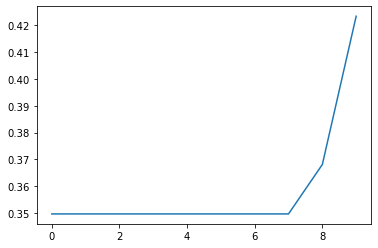

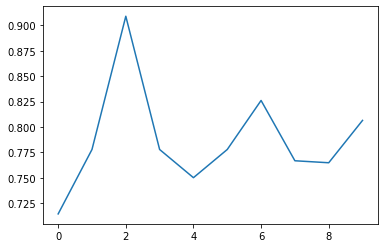

In [21]:
print(history.history.keys())
pyplot.plot(history.history['accuracy'])
pyplot.show()
pyplot.plot(history.history['precision'])
pyplot.show()
pyplot.plot(history.history['recall'])
pyplot.show()